<a href="https://colab.research.google.com/github/SumanMishra0406/bank_project/blob/main/Bank_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

bank = pd.read_csv("bank-full.csv", sep=";")

# **Additional Information about dataset:**

# Input Variables:
1.   age (numeric)
2.   job (categorical)
3.   marital (categorical)
4.   education (categorical)
5.   default (binary): has credit in default?
6.    balance (numeric): average yearly balance, in euros
7.    housing (binary): has housing loan?
8.  loan (binary): has personal loan?
9.  contact (categorical): contact. communication type
10. day (numeric): last contact day of the month
11. month (categorical): last contact month of year
12. duration (numeric): last contact duration, in seconds
   
# Other Attributes:
13. campaign(numeric): number of contacts performed during this campaign and for this client

14. pdays (numeric): number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)

15. previous (numeric): number of contacts performed before this campaign and for this client

16. poutcome (categorical): outcome of the previous marketing campaign

#Target Variable
17. y (binary): has the client subscribed a term deposit?


In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank.shape

(45211, 17)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Check for null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#Seperating categorical and numerical columns
#looping through the columns
#check if datatype is object('O')
#if yes add to list
cat_cols = [bank.columns[i]
            for i in range(1, bank.shape[1]-1)
            if bank.iloc[:,i].dtype=='O']
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
# Select only the numerical columns
numerical_columns = bank.select_dtypes(include=[np.number])
numerical_columns

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [ ]:
numerical_columns = numerical_columns.drop("age", axis=1)

In [ ]:
#Outlier Detection
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
outlier_multiplier = 1.5
# Identify outliers in each numerical column
outliers = (numerical_columns < (Q1 - outlier_multiplier * IQR)) | (numerical_columns > (Q3 + outlier_multiplier * IQR))
# Print the indices of outliers for each numerical column
for col in numerical_columns.columns:
    column_outliers = np.where(outliers[col])[0]
    if len(column_outliers) > 0:
        print(f"Outliers in column '{col}':", column_outliers)
    else:
        print(f"No outliers in column '{col}'")

Outliers in column 'balance': [   34    65    69 ... 45185 45191 45208]
No outliers in column 'day'
Outliers in column 'duration': [   37    43    53 ... 45200 45206 45208]
Outliers in column 'campaign': [  758   780   906 ... 44770 44886 45056]
Outliers in column 'pdays': [24060 24062 24064 ... 45204 45208 45210]
Outliers in column 'previous': [24060 24062 24064 ... 45204 45208 45210]


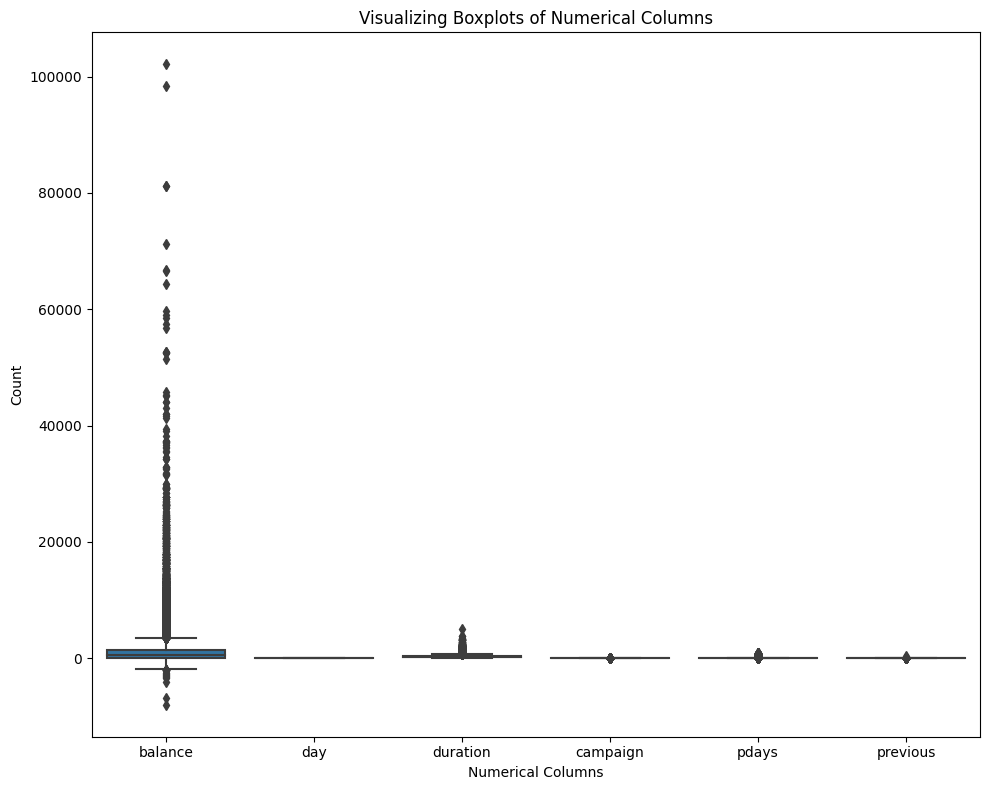

In [ ]:
# Create a single row of seven boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(data=numerical_columns)
plt.title('Visualizing Boxplots of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
#Outlier Treatment - shape before treatment
numerical_columns.shape

(45211, 6)

In [ ]:
#Outlier Treatment - Deletion
# Find rows containing outliers in any column
rows_with_outliers = np.any(outliers, axis=1)
num_no_outliers = numerical_columns[~rows_with_outliers]

In [ ]:
bank2 = num_no_outliers
bank2.shape

(28407, 6)

In [ ]:
!pip install factor_analyzer

In [ ]:
#Factor Analysis
from factor_analyzer import FactorAnalyzer
#Using the Bartlett Test to check whether or not the observed variables intercorrelate
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(numerical_columns)
chi_square_value, p_value

(12730.312058909421, 0.0)

Using the Bartlett's test, the p-value is 0. Therefore test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [ ]:
#KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(numerical_columns)
kmo_model

0.5164437800342152

Our KMO value is slightly higher than 0.5, indicating that there might be some partial correlations in comparison to the sum of the correlation of the data.

In [ ]:
#Eigen Values
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(numerical_columns)
ev, vectors = fa.get_eigenvalues()
ev

array([1.50905459, 1.15368435, 1.00993209, 0.95885965, 0.82777627,
       0.54069304])

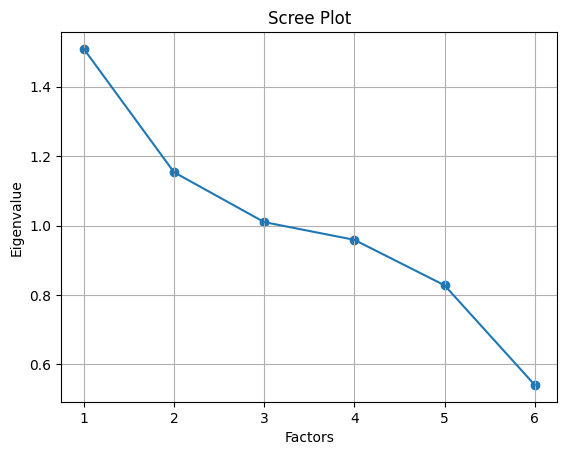

In [ ]:
# Create scree plot to visualize eigenvalues and determine factors
plt.scatter(range(1,numerical_columns.shape[1]+1),ev)
plt.plot(range(1,numerical_columns.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


From the scree plot above, we can observe that there are 3 factors that have an eigen value greater than 1. Therefore, we must choose only 3 factors to continue our analysis.

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(numerical_columns)
factor_df=pd.DataFrame(fa.loadings_,index=numerical_columns.columns)
print(factor_df)

                 0         1         2         3         4    5
balance   0.009647  0.002587  0.037706  0.157831 -0.000735  0.0
day      -0.061542  0.400226 -0.021164  0.030575 -0.045035  0.0
duration -0.008632 -0.068736  0.262533  0.075538 -0.000416  0.0
campaign -0.041818  0.403612 -0.204092 -0.047204  0.099820  0.0
pdays     0.679282 -0.137473 -0.015682 -0.014154 -0.086198  0.0
previous  0.676382 -0.021329  0.002850  0.064327  0.076705  0.0


1. Factor 0: Pdays and Previous
2. Factor 1: day and campaign
3. Factor 2: duration
4. Factor 3: balance and duration
5. Factor 4: too small
6. Factor 5: too small

In [ ]:
fa.get_factor_variance()

(array([0.92462094, 0.3471685 , 0.1127007 , 0.03811789, 0.02530647,
        0.        ]),
 array([0.15410349, 0.05786142, 0.01878345, 0.00635298, 0.00421774,
        0.        ]),
 array([0.15410349, 0.21196491, 0.23074836, 0.23710134, 0.24131908,
        0.24131908]))

From the table above, it is clear that the three factors are

EDA

In [ ]:
#Adding treated columns and creating a new dataframe with target variable
bank2 = numerical_columns.join(bank["y"])

In [ ]:
bank2["y"].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [ ]:
# Perform one-hot encoding
target = pd.get_dummies(bank2["y"])

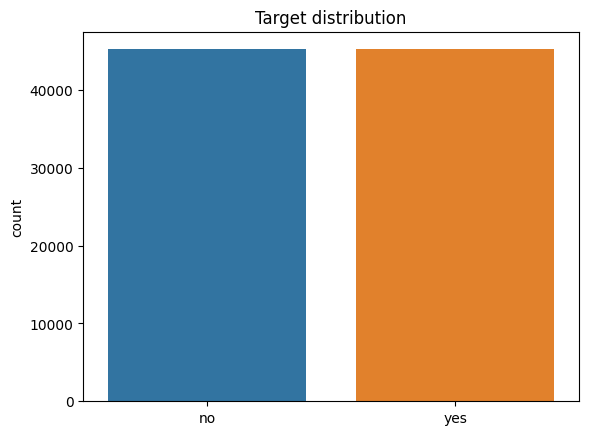

In [ ]:
sns.countplot(target)
plt.title('Target distribution')
plt.show()

From the bar chart above, the amount of people who subscribed and didn't subscribe to the term deposit is the same.

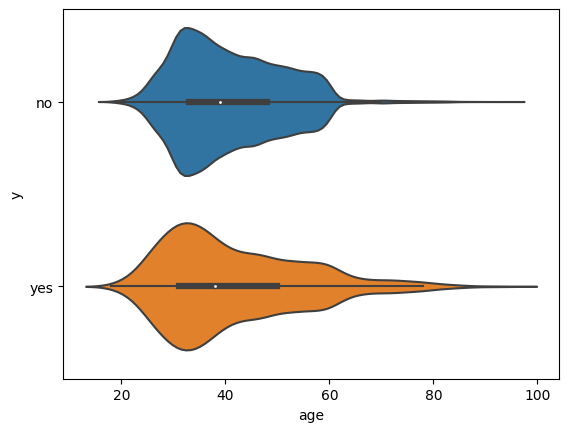

In [ ]:
sns.violinplot(x="age", y="y", data=bank, size=8)
plt.show()

<Axes: xlabel='y', ylabel='count'>

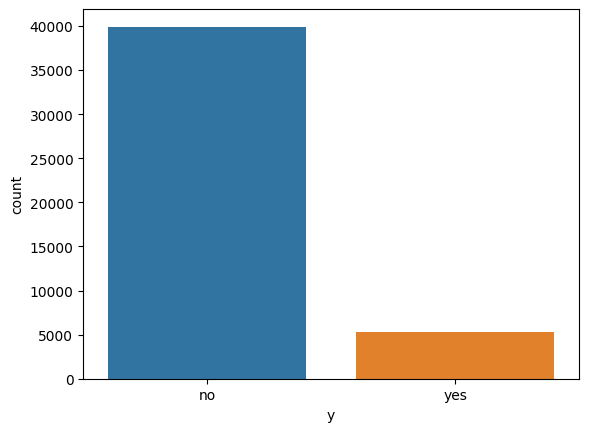

In [ ]:
sns.countplot(data=bank,x=bank['y'])

In [ ]:
bank["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

<Axes: xlabel='poutcome'>

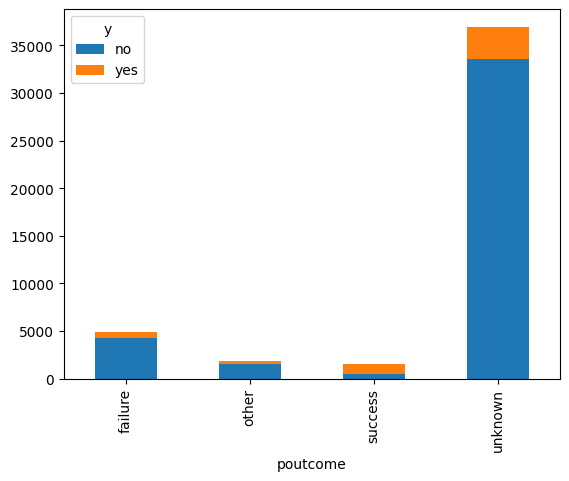

In [ ]:
# bar chart for poutcome
types = bank.groupby("poutcome")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

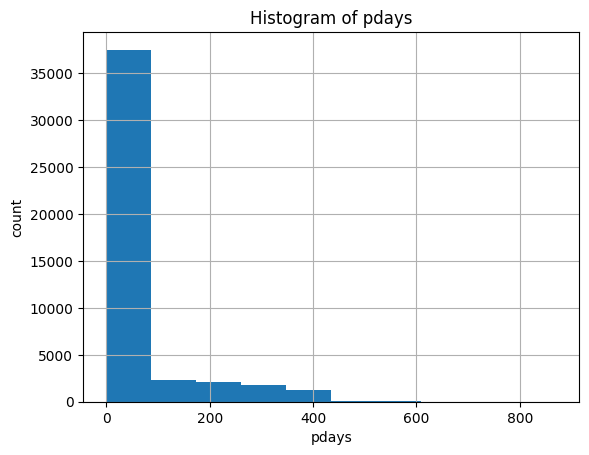

In [ ]:
#histogram of pdays
bank['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

<Axes: xlabel='month'>

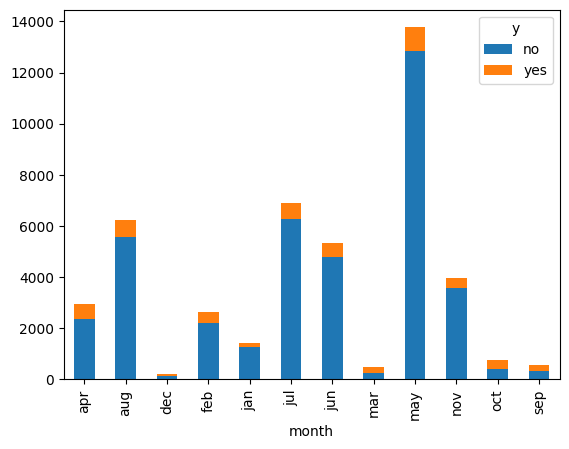

In [ ]:
#bar chart for month
types = bank.groupby("month")["y"].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='loan'>

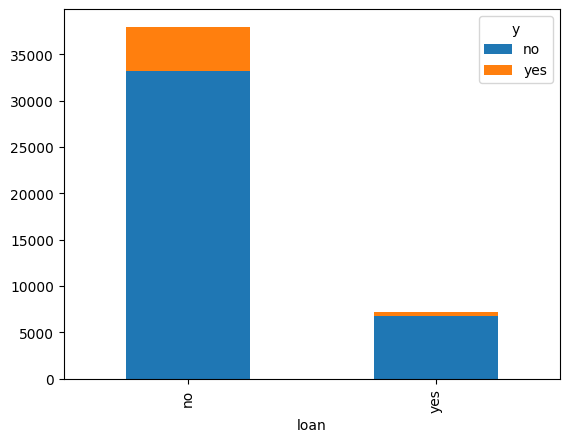

In [ ]:
# group by loan to display bar chart
types = bank.groupby("loan")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='marital'>

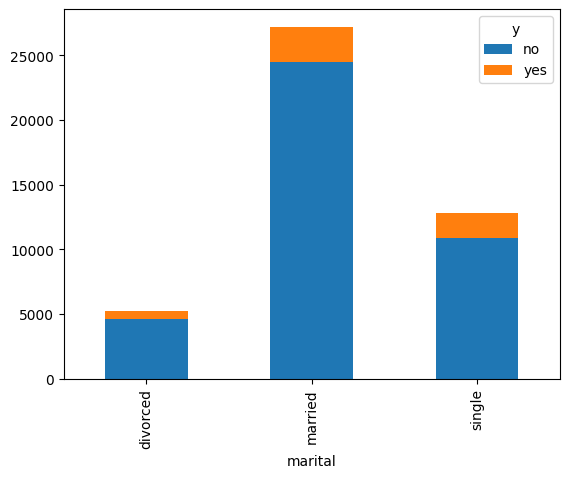

In [ ]:
# group by marital to display bar chart
types = bank.groupby("marital")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [ ]:
bank["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
bank["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

<Axes: xlabel='job'>

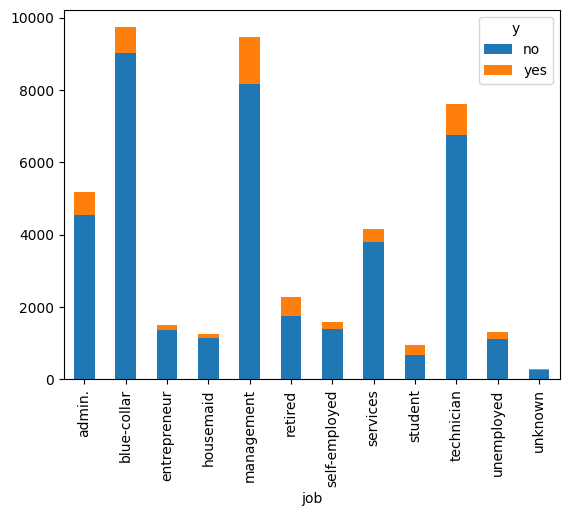

In [ ]:
# group by job to display bar chart
types = bank.groupby("job")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='education'>

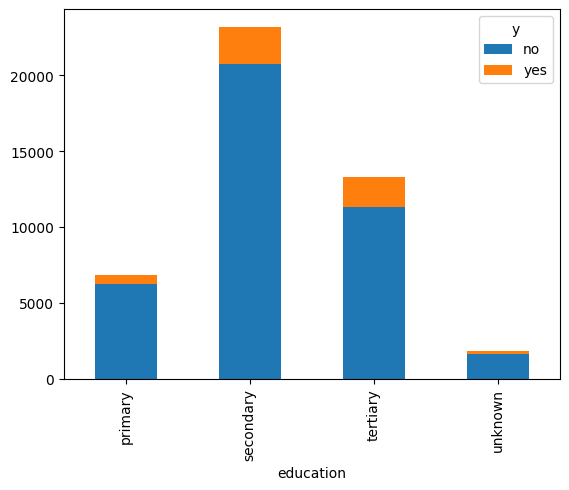

In [ ]:
# group by education to display bar chart
types = bank.groupby("education")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Preprocessing

In [ ]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
bank['y'].replace(to_replace='yes', value=1, inplace=True)
bank['y'].replace(to_replace='no',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
bank['loan'].replace(to_replace='no', value=1, inplace=True)
bank['loan'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,1,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
bank['default'].replace(to_replace='no', value=1, inplace=True)
bank['default'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,1,2143,yes,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,yes,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,yes,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,yes,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,no,1,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
one_hot = pd.get_dummies(bank['marital'])
bank = bank.drop('marital',axis = 1)
bank = bank.join(one_hot)

In [ ]:
bank = bank.drop('divorced',axis = 1)

In [ ]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,58,management,tertiary,1,2143,yes,1,unknown,5,may,261,1,-1,0,unknown,0,1,0
1,44,technician,secondary,1,29,yes,1,unknown,5,may,151,1,-1,0,unknown,0,0,1
2,33,entrepreneur,secondary,1,2,yes,0,unknown,5,may,76,1,-1,0,unknown,0,1,0
3,47,blue-collar,unknown,1,1506,yes,1,unknown,5,may,92,1,-1,0,unknown,0,1,0
4,33,unknown,unknown,1,1,no,1,unknown,5,may,198,1,-1,0,unknown,0,0,1


In [ ]:
# one hot encoding for education feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['education'])
bank = bank.drop('education',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single,primary,secondary,tertiary
0,58,management,1,2143,yes,1,unknown,5,may,261,1,-1,0,unknown,0,1,0,0,0,1
1,44,technician,1,29,yes,1,unknown,5,may,151,1,-1,0,unknown,0,0,1,0,1,0
2,33,entrepreneur,1,2,yes,0,unknown,5,may,76,1,-1,0,unknown,0,1,0,0,1,0
3,47,blue-collar,1,1506,yes,1,unknown,5,may,92,1,-1,0,unknown,0,1,0,0,0,0
4,33,unknown,1,1,no,1,unknown,5,may,198,1,-1,0,unknown,0,0,1,0,0,0


In [ ]:
one_hot = pd.get_dummies(bank['job'])
bank = bank.drop('job',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,1,2143,yes,1,unknown,5,may,261,1,...,0,0,0,1,0,0,0,0,0,0
1,44,1,29,yes,1,unknown,5,may,151,1,...,0,0,0,0,0,0,0,0,1,0
2,33,1,2,yes,0,unknown,5,may,76,1,...,0,1,0,0,0,0,0,0,0,0
3,47,1,1506,yes,1,unknown,5,may,92,1,...,1,0,0,0,0,0,0,0,0,0
4,33,1,1,no,1,unknown,5,may,198,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
one_hot = pd.get_dummies(bank['contact'])
bank = bank.drop('contact',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone
0,58,1,2143,yes,1,5,may,261,1,-1,...,0,1,0,0,0,0,0,0,0,0
1,44,1,29,yes,1,5,may,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,1,2,yes,0,5,may,76,1,-1,...,0,0,0,0,0,0,0,0,0,0
3,47,1,1506,yes,1,5,may,92,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,1,1,no,1,5,may,198,1,-1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# one hot encoding for month feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['month'])
bank = bank.drop('month',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('dec',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,1,2143,yes,1,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,1,29,yes,1,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,1,2,yes,0,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1,1506,yes,1,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,1,no,1,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
one_hot = pd.get_dummies(bank['poutcome'])
bank = bank.drop('poutcome',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('other',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,58,1,2143,yes,1,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,29,yes,1,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,1,2,yes,0,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1,1506,yes,1,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,1,no,1,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
bank["housing"].replace(to_replace='no', value=1, inplace=True)
bank["housing"].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,58,1,2143,0,1,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,29,0,1,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,1,2,0,0,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1,1506,0,1,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,1,1,1,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45211 non-null  int64
 1   default        45211 non-null  int64
 2   balance        45211 non-null  int64
 3   housing        45211 non-null  int64
 4   loan           45211 non-null  int64
 5   day            45211 non-null  int64
 6   duration       45211 non-null  int64
 7   campaign       45211 non-null  int64
 8   pdays          45211 non-null  int64
 9   previous       45211 non-null  int64
 10  y              45211 non-null  int64
 11  married        45211 non-null  uint8
 12  single         45211 non-null  uint8
 13  primary        45211 non-null  uint8
 14  secondary      45211 non-null  uint8
 15  tertiary       45211 non-null  uint8
 16  admin.         45211 non-null  uint8
 17  blue-collar    45211 non-null  uint8
 18  entrepreneur   45211 non-null  uint8
 19  hous

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(bank.drop("y",axis=1))
scaled_features=scaler.transform(bank.drop("y",axis=1))
bank_feat=pd.DataFrame(scaled_features,columns=bank.columns[:-1])
bank_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jan,jul,jun,mar,may,nov,oct,sep,failure,success
0,1.606965,0.13549,0.256419,-0.893915,0.436803,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
1,0.288529,0.13549,-0.437895,-0.893915,0.436803,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
2,-0.747384,0.13549,-0.446762,-0.893915,-2.289359,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
3,0.571051,0.13549,0.047205,-0.893915,0.436803,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
4,-0.747384,0.13549,-0.447091,1.118674,0.436803,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519


In [ ]:
CorrBank=bank_feat.drop("y", axis=1).apply(lambda x: x.corr(bank_feat.y))


In [ ]:
Corr2=CorrBank.sort_values(ascending=False)

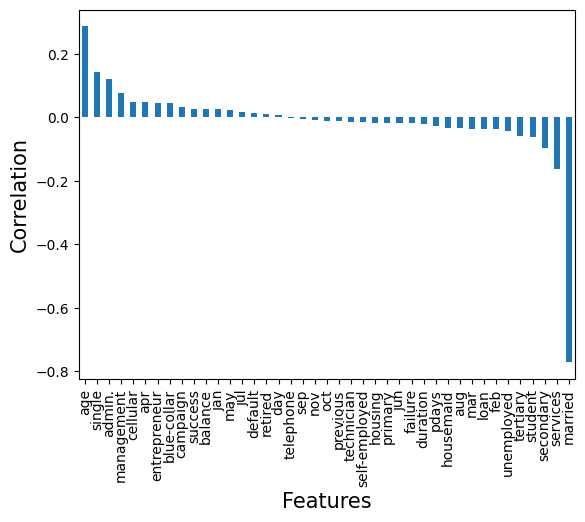

In [ ]:
Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)


plt.show()

In [ ]:
corr = bank.corr()
corr

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
age,1.000000,0.017879,0.097783,0.185513,0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,...,0.002902,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.004927,0.035526,-0.000816
default,0.017879,1.000000,0.066745,-0.006025,0.077234,-0.009424,0.010021,-0.016822,0.029979,0.018329,...,-0.044257,-0.007582,0.013991,0.002946,-0.006129,0.017454,0.013953,0.026389,0.023344,-0.039490
balance,0.097783,0.066745,1.000000,0.068768,0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,...,-0.064402,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.011857,0.035240,-0.030271
housing,0.185513,-0.006025,0.068768,1.000000,0.041323,0.027982,-0.005075,0.023599,-0.124178,-0.037076,...,0.061231,0.102298,0.066284,-0.427980,-0.001152,0.085439,0.076343,-0.106795,0.091360,0.063755
loan,0.015655,0.077234,0.084350,0.041323,1.000000,-0.011370,0.012412,-0.009980,0.022754,0.011043,...,-0.167764,0.022749,0.029761,0.027867,-0.019154,0.030097,0.033663,0.002186,0.053713,-0.031406
day,-0.009120,-0.009424,0.004503,0.027982,-0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,...,0.147199,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.030321,0.086256
duration,-0.004648,0.010021,0.021560,-0.005075,0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,...,0.016163,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.018925,0.042389,-0.003491
campaign,0.004760,-0.016822,-0.014578,0.023599,-0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,...,0.104148,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.057486,0.107965
pdays,-0.023758,0.029979,0.003435,-0.124178,0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,...,-0.136274,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.701052,0.228539,-0.869962
previous,0.001288,0.018329,0.016674,-0.037076,0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,...,-0.082943,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.350627,0.201424,-0.532763


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

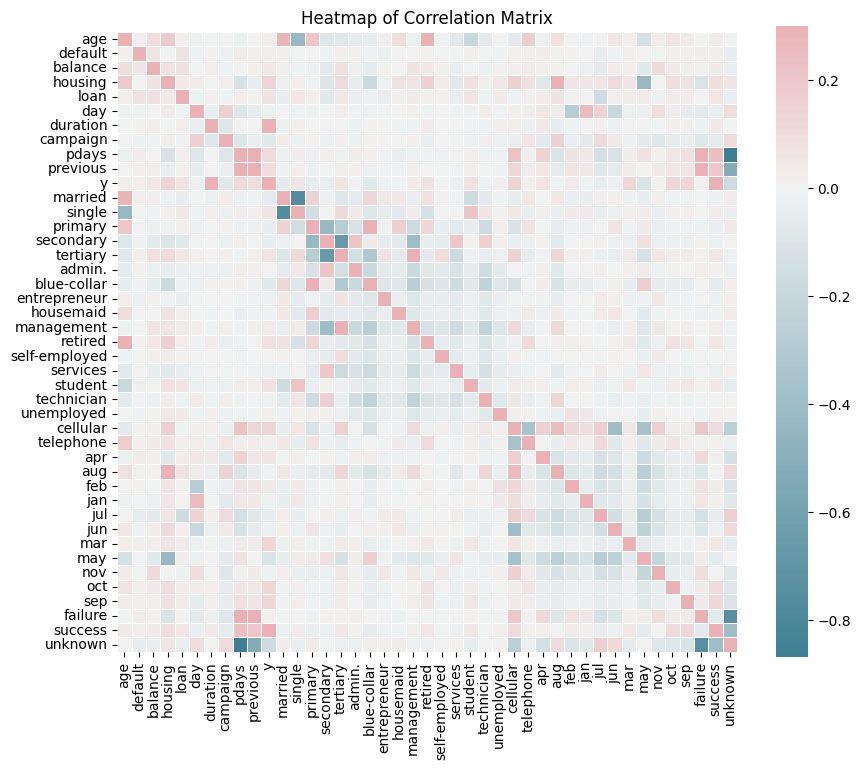

In [ ]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
column_to_drop = 'y'
X = bank.drop(columns=[column_to_drop])
y = bank.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [ ]:
!pip install scikit-learn matplotlib graphviz


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [ ]:
feature= X.columns.tolist()

KeyboardInterrupt: ignored

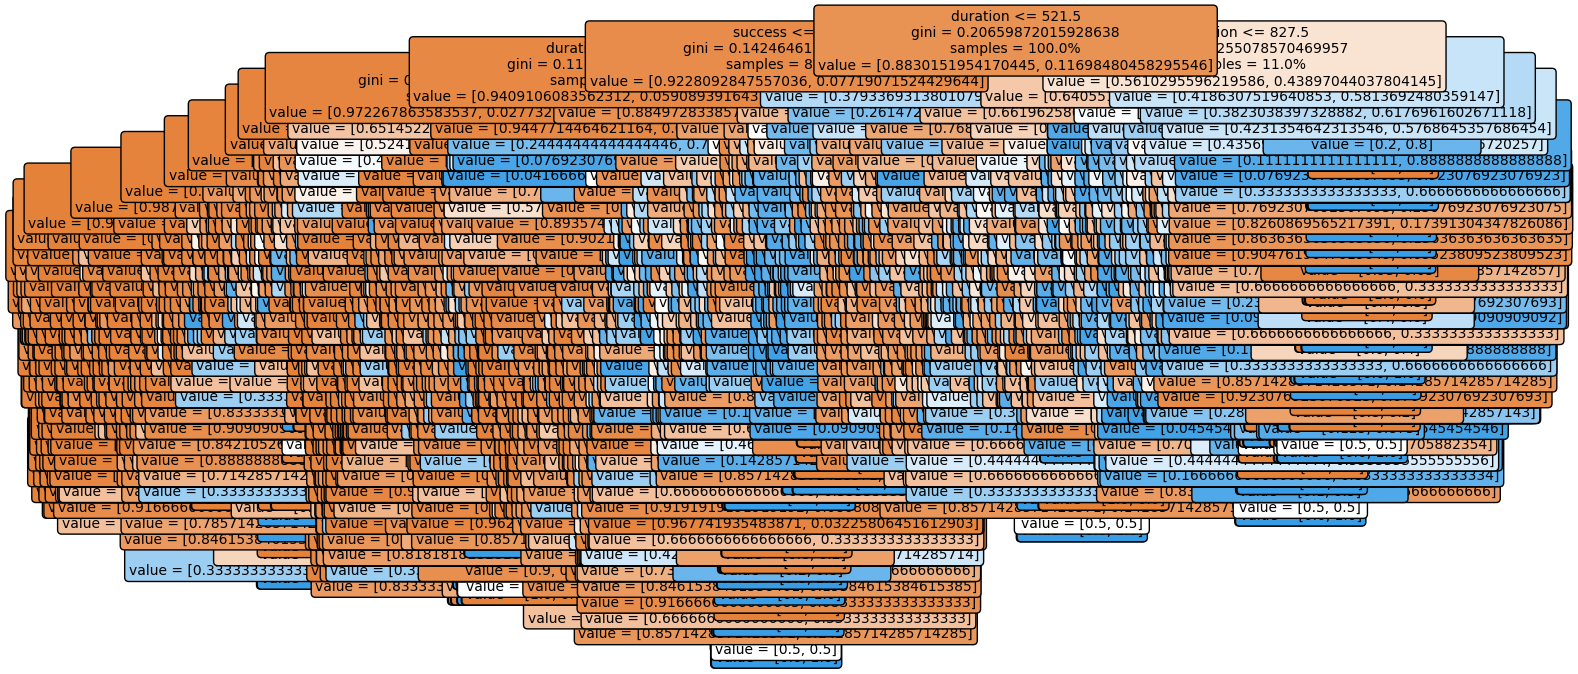

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf,feature_names=feature,filled=True,precision=2,proportion=True,rounded=True)
plt.show()